<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Arman Lotfalikhani

**Student ID**: 99109166

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [27]:
X, Y = None, None

### START CODE HERE ###
dataset=pd.read_csv('q1.csv')
dataset=dataset.drop(columns=['Y2'])
Y=dataset['Y1'].to_numpy()
X=(dataset.drop(columns=['Y1'])).to_numpy()
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(768, 8)
(768,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Different features have different ranges (hence, variances) so only the features with the lowest variances will affect our classification and the whole dataset is not unilized. Also, by normalizing, we minimize computational errors, overflows and underflows.

In [28]:
### START CODE HERE ###
X=np.divide(X-np.mean(X,axis=0),np.std(X,axis=0))
Y=(Y-np.mean(Y))/np.std(Y)
print(X[0])
print(Y[0])
### END CODE HERE ###

[ 2.04177671 -1.78587489 -0.56195149 -1.47007664  1.         -1.34164079
 -1.76044698 -1.81457514]
-0.6701162415763511


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [29]:
### START CODE HERE ###
v=np.ones(X.shape[0])
X=np.insert(X,0,v,axis=1)
print(X[0]) #To verify the code output
### END CODE HERE ###

print(X.shape)

[ 1.          2.04177671 -1.78587489 -0.56195149 -1.47007664  1.
 -1.34164079 -1.76044698 -1.81457514]
(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [33]:
def loss(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    delta=X@w-Y
    loss=np.mean(np.power(delta,2),axis=0)
    ### END CODE HERE ###
    return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer: $$w=(X^TX)^{-1}X^TY$$ if $X^TX$ is invertible. If not, we still have $$X^T(Xw-Y)=0\Rightarrow w=X^{\dagger}Y$$

We use the psuedoinverse as advised by Morphy, for numerical stability and to avoid the case in which $X^TX$ is singular.

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [31]:
def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    ### START CODE HERE ###
    X_dagger=np.linalg.pinv(X)
    w=X_dagger@Y
    ### END CODE HERE ###
    return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [65]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")
print(w)

loss for this problem using direct method is 0.08379791780841638
[-4.20670443e-17 -6.79038297e-01 -3.73577118e-01  7.05448253e-02
 -3.98359602e-01  7.23687495e-01 -2.58653392e-03  2.63170601e-01
  3.13216718e-02]


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**: $\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2=\frac{1}{m}(Y^T-(Xw)^T)(Xw-Y)\Rightarrow \nabla \mathcal{L}=\frac{2}{m}(X^TXw-X^TY)$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [35]:
def gradient(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    grad=2/m*X.T@(X@w-Y)
    ### END CODE HERE ###
    return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [56]:
def gradient_descent(X, Y, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, None 
    ### START CODE HERE ###
    #Initializing w
    #Importnant note: The code for generating random values is very similar to the randn function. There are only
    #two differences: 1-randn is considered obsolete in NumPy docummentation and we are not advised to use it
    #2-specifying a seed in the new function ensures we start from the same w for each alpha, for better comparison
    rng=np.random.default_rng(seed=100)
    w=rng.standard_normal(n)
    
    loss_history=np.zeros(num_iter+1)
    #Implementing the algorithm
    for i in range (num_iter+1):
        loss_history[i]=loss(X,Y,w)
        w=w-alpha*gradient(X,Y,w)
    ### END CODE HERE ###
    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: For small learning steps, the loss function seems to converge, and the convergence rate is increased initially. But if the step is set too high, the loss function diverges after a number of steps.

In this example, for the best learning rate we have $\alpha=0.25$

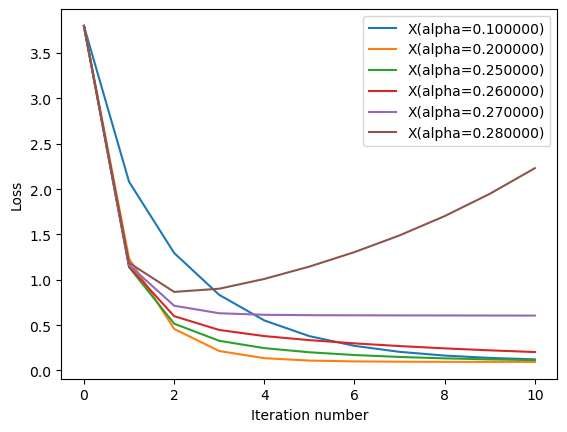

In [85]:
### START CODE HERE ###
alphas=[0.1, 0.2, 0.25, 0.26, 0.27, 0.28]
num_iter=10
for i in range(len(alphas)):
    w, loss_history= gradient_descent(X, Y, alphas[i], num_iter)
    plt.plot(loss_history,label='X(alpha=%f)' %alphas[i])
    plt.xlabel('Iteration number')
    plt.ylabel('Loss')
plt.legend()
plt.show()

### END CODE HERE ###

0.08474056574513561
w for alpha=0.100000 is:
[ 3.75351548e-16 -3.71115862e-01  5.10327448e-01 -2.12127997e-01
 -8.60018507e-01  8.58381217e-01 -2.58653392e-03  2.63170601e-01
  3.13216718e-02]
0.08395615611509827
w for alpha=0.200000 is:
[ 3.62394889e-16 -5.52992511e-01  3.73284169e-01 -2.35865039e-01
 -9.82190702e-01  7.78827236e-01 -2.58653392e-03  2.63170601e-01
  3.13216718e-02]
0.08386271156952978
w for alpha=0.250000 is:
[ 3.68682949e-16 -5.98417846e-01  3.39055346e-01 -2.41793050e-01
 -1.01270557e+00  7.58955559e-01 -2.58653392e-03  2.63170601e-01
  3.13216718e-02]


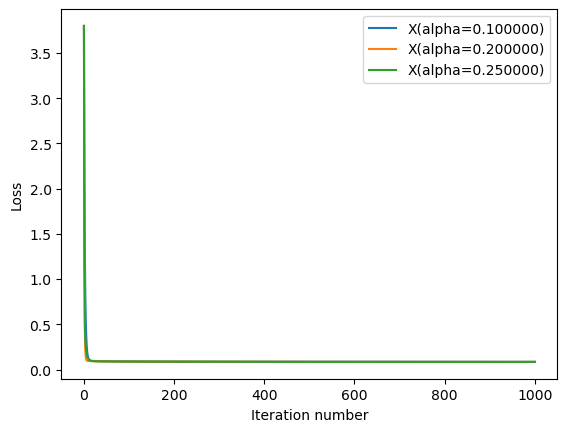

In [90]:
good_alphas=[0.1, 0.2, 0.25]
num_iter=1000
for i in range(len(good_alphas)):
    w, loss_history= gradient_descent(X, Y, good_alphas[i], num_iter)
    print(loss_history[len(loss_history)-1])
    print('w for alpha=%f is:'%good_alphas[i])
    print(w)
    plt.plot(loss_history,label='X(alpha=%f)' %good_alphas[i])
    plt.xlabel('Iteration number')
    plt.ylabel('Loss')
plt.legend()
plt.show()

**Note**: Not all elements of $w$ converge to the values from direct calculation, even though the loss function converges well. 

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: The direct method has the benefit of less computation. Also, we need not worry about the step size and potential diverging of our parameters. Gradient Descent is better when there is no easy solution to the equation $\nabla \mathcal{L}=0$ or there are multiple answers to this equation. Also, by comparing the values for $w$ we see that even after many iterations and using appropriate learning rates, not all elements of $w$ converge to the values from direct calculation, even though the loss function converges well. 

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

0.09125209073761799
w for alpha=0.100000 is:
[ 0.00146864 -0.15104365  0.38933673 -0.06925443 -0.32047356  1.00803766
 -0.01211924  0.25020381  0.02583234]
0.11716246554500649
w for alpha=0.200000 is:
[ 0.05263964 -0.58392404 -0.51380129  0.18497035 -0.29910187  0.8243544
 -0.05415484  0.28271876  0.04817683]
0.11266509896628059
w for alpha=0.240000 is:
[-0.00203051 -0.54047676  0.0561801  -0.06424147 -0.32686574  0.95422993
  0.01845409  0.17973707  0.02098357]


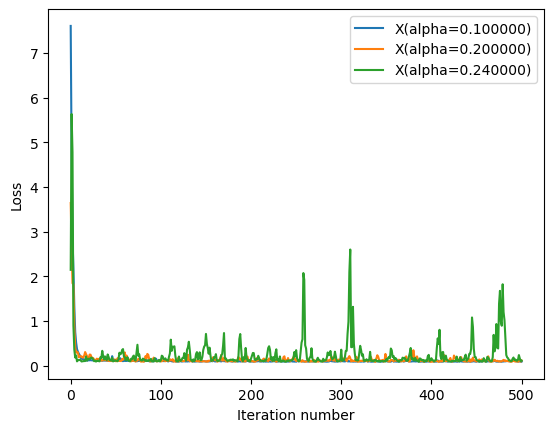

In [93]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    k: number of data points used in each iteration
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, None 
    rng=np.random.default_rng()
    loss_history=np.zeros(num_iter+1)
    w=rng.standard_normal(n)
    ### START CODE HERE ###
    for i in range(num_iter+1):
        indices=rng.choice(m,size=k)
        selected_Y=Y[indices]
        selected_X=X[indices]
        loss_history[i]=loss(X,Y,w)
        w=w-alpha*gradient(selected_X,selected_Y,w)
    ### END CODE HERE ###
    return w, loss_history
alphas=[0.1, 0.2, 0.24]
num_iter=500
k=10
for i in range(len(alphas)):
    w, loss_history= stochastic_gradient_descent(X, Y, k,alphas[i], num_iter)
    print(loss_history[len(loss_history)-1])
    print('w for alpha=%f is:'%alphas[i])
    print(w)
    plt.plot(loss_history,label='X(alpha=%f)' %alphas[i])
    plt.xlabel('Iteration number')
    plt.ylabel('Loss')
plt.legend()
plt.show()

We see that the values for $w$ are not similar the expected values at all. Also, the loss function does not decrease below a certain amount, which is the result of using a subset of the dataset each time. In additon, we observe that larger learning rates result in larger random spikes in the loss function, which is not desirable.